# Stable Diffusion Model
- Image generating deep learning model.
- It uses diffusion model, called a latent diffusion model.

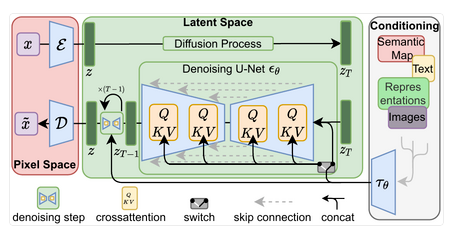

## Architecture
- Stable Diffusion consists of three parts: the variational autoencoder (VAE), U-Net, and an optional text encoder.
- The VAE encoder compresses the image from pixel space to a smaller dimensional latent space, capturing a more fundamental semantic meaning of the image.
- Gaussian noise is iteratively applied to the compressed latent representation during forward diffusion.
- The U-Net block, composed of a ResNet backbone, denoises the output from forward diffusion backwards to obtain a latent representation.
- Finally, the VAE decoder generates the final image by converting the representation back into pixel space.
- The denoising step can be flexibly conditioned on a string of text, an image, or another modality.
- The encoded conditioning data is exposed to denoising U-Nets via a - cross-attention mechanism.
- For conditioning on text, the fixed, pretrained CLIP ViT-L/14 text encoder is used to transform text prompts to an embedding space.
- Researchers point to increased computational efficiency for training and generation as an advantage of Latent Diffusion Models (LDMs).

## Running the Model

In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"

In [2]:
import os
import torch
import cv2
import numpy as np


from tqdm.auto import tqdm
from huggingface_hub import notebook_login
from google.colab import output
from PIL import Image, ImageDraw
from IPython.display import HTML
from base64 import b64encode
from torch import autocast
from torch.nn import functional as F
from diffusers import StableDiffusionPipeline, AutoencoderKL
from diffusers import UNet2DConditionModel, PNDMScheduler, LMSDiscreteScheduler
from diffusers.schedulers.scheduling_ddim import DDIMScheduler
from transformers import CLIPTextModel, CLIPTokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

output.enable_custom_widget_manager()
notebook_login()

In [3]:
# Load the model
pipe = StableDiffusionPipeline.from_pretrained(
    'runwayml/stable-diffusion-v1-5',
    revision='fp16',
    torch_dtype=torch.float16,
    use_auth_token=True
)

# Move the pipeline to the specified device
pipe = pipe.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-v1-5 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found
Keyword arguments {'use_auth_token': True} a

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

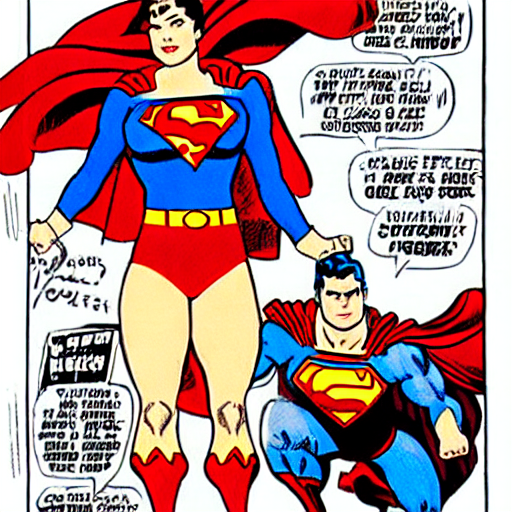

In [8]:
prompt = 'superman with the wonder woman'
image = pipe(prompt, num_inference_steps=50)
image = image.images[0]
image

In [5]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

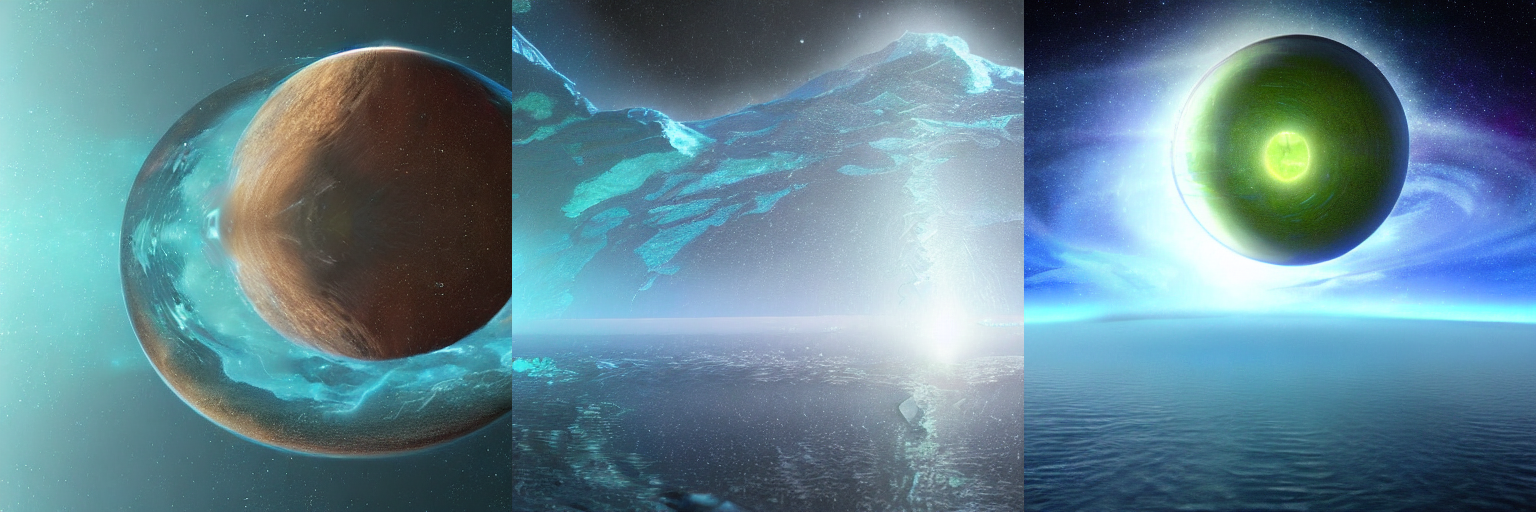

In [6]:
n_images = 3
prompts = ['Planet scale halo of water in space digital art, Trending on ArtStation'] * n_images

images = pipe(prompts, num_inference_steps=50).images
image_grid(images, rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

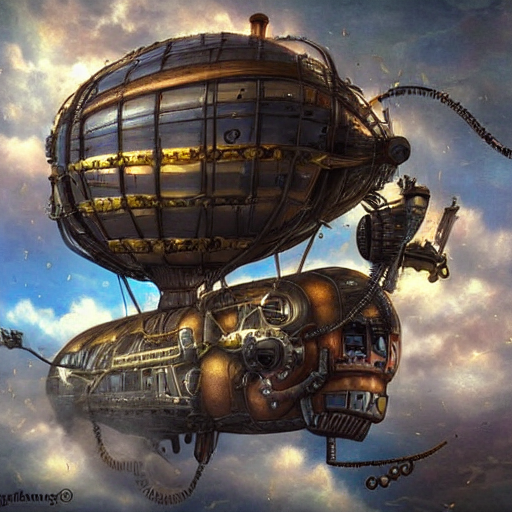

In [7]:
prompt = 'Steampunk airship bursting through the clouds, cyberpunk art'
image = pipe(prompt, num_inference_steps=50)
image = image.images[0]
image